In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24

In [8]:
def load_dataset(csv_path):
    
    # x_1,x_2,y
    # 2.9118085367844344,60.35961272195973,0.0
    # 3.77474553943451,344.1492842964323,0.0
    
    with open(csv_path, 'r') as csv_fh:
        headers = csv_fh.readline().strip().split(',')
    x_cols = [i for i in range(len(headers)) if headers[i].startswith('x')]  # index
    l_cols = [i for i in range(len(headers)) if headers[i] == 'y']
    
    X = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=x_cols)
    y = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=l_cols)
    
    return X, y

ds1_train_path = 'data/ds1_train.csv'
ds1_valid_path = 'data/ds1_valid.csv'
ds2_train_path = 'data/ds2_train.csv'
ds2_valid_path = 'data/ds2_valid.csv'

X_train, y_train = load_dataset(ds1_train_path)
X_valid, y_valid = load_dataset(ds1_valid_path)
X = np.hstack((np.ones((X_train.shape[0],1)), X_train))
print(X_train.shape)
print(y_train.shape)

(800, 2)
(800,)


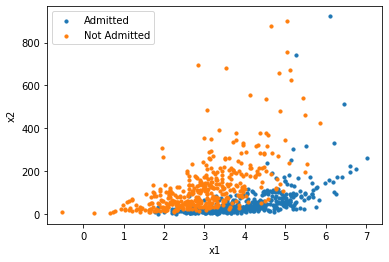

In [9]:
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X_train[y_train == 1, -2], X_train[y_train == 1, -1], s=10, label='Admitted')
plt.scatter(X_train[y_train == 0, -2], X_train[y_train == 0, -1], s=10, label='Not Admitted')
plt.legend()
plt.show()

In [10]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1.0 / (1 + np.exp(-x))
def cost_function(theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    J = (-1/m) * np.sum(np.multiply(y, np.log(sigmoid(x @ theta))) + np.multiply((1-y), np.log(1 - sigmoid(x @ theta))))
    return J

def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(x @ theta) - y)

def fit(x, y, theta):
    opt_weights = opt.fmin_tnc(func=cost_function, x0=theta.flatten(), fprime=gradient, args=(x, y.flatten()))
    # opt.fmin_tnc is an optimization solver that finds the minimum of an unconstrained function.
    return opt_weights[0]
theta = np.zeros((X_train.shape[1] + 1, 1))
parameters = fit(X, y_train, theta)
parameters

array([-6.25737577,  2.47596024, -0.02990041])

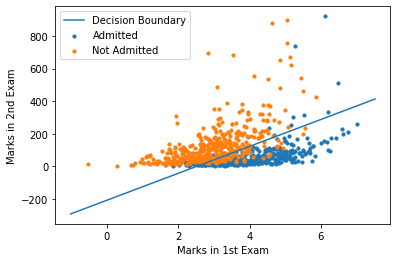

In [12]:
x_values = [np.min(X_train[:,0] - 0.5), np.max(X_train[:,0] + 0.5)]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X_train[y_train == 1, -2], X_train[y_train == 1, -1], s=10, label='Admitted')
plt.scatter(X_train[y_train == 0, -2], X_train[y_train == 0, -1], s=10, label='Not Admitted')
plt.plot(x_values, y_values,label='Decision Boundary', linewidth=1.5)
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()